# Model 2, Faster RCNN
Ximena Vazquez Mellado Flores 171319

##First step, get model.
In this step, the model was obtained cloning a GitHub repository, then the installation of the needed requirements located in `requirements.txt`.

The repository is located [here](https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git)

##Rationale of the selection
In the context of our project, which involves fine-tuning object detection models for real-time identification and tracking of big cats, the selection of the Faster R-CNN model is strategic. Faster R-CNN excels in scenarios where precise localization of objects is critical, as it operates through a two-stage process: the initial Region Proposal Network (RPN) efficiently suggests candidate object regions, and the subsequent Fast R-CNN detector refines these proposals to yield accurate bounding boxes and class predictions. This architecture is well-suited for tasks requiring detailed identification, particularly in the context of monitoring and conserving big cat populations.

Additionally, Faster R-CNN's ability to handle complex scenes with potential occlusions and interactions between objects aligns with the challenges posed by wildlife monitoring. The model strikes a balance between accuracy and computational efficiency, making it a pragmatic choice for real-time applications. Its robust performance in diverse detection scenarios, coupled with its established track record in object detection, positions Faster R-CNN as a reliable solution for our specific project requirements.

In [ ]:
# clone the repo
!git clone https://github.com/sovit-123/fastercnn-pytorch-training-pipeline.git

fatal: destination path 'fastercnn-pytorch-training-pipeline' already exists and is not an empty directory.


In [ ]:
# Enter the repo directory.
%cd fastercnn-pytorch-training-pipeline/

/content/fastercnn-pytorch-training-pipeline


In [ ]:
# Install the Requirements
!pip install -r requirements.txt

##Next step, get the needed data

For this assignment, the "Big Cats" dataset was used from roboflow. This dataset can be found [here](https://universe.roboflow.com/ds/4P06Jv8ugF?key=SNHxb7etDI)

An example of the dataset can be seen in the following image:

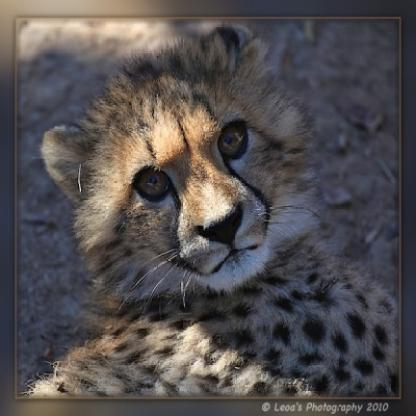

This dataset is divided into three different and useful folders:
- Train
- Test
- Validation

Since the data is in a `zip` format, then extraction is needed.

In [ ]:
# get and unzip data
!curl -L "https://universe.roboflow.com/ds/4P06Jv8ugF?key=SNHxb7etDI" > roboflow.zip; unzip roboflow.zip -d custom_data; rm roboflow.zip;

## Thirdly, create the custom dataset YAML file
Since the model accepts a custom dataset, then a YAML file was created with the `Big Cats` dataset.

This YAML file has these labels:
- TRAIN_DIR_IMAGES
- TRAIN_DIR_LABELS
- VALID_DIR_IMAGES
- VALID_DIR_LABELS

Four classes:
- background
- Cheetah
- Jaguar
- Tiger

Number of classes including background : 4

Save validation predictions : True

In [ ]:
%%writefile data_configs/custom_data.yaml
# Images and labels direcotry should be relative to train.py
TRAIN_DIR_IMAGES: 'custom_data/train'
TRAIN_DIR_LABELS: 'custom_data/train'
VALID_DIR_IMAGES: 'custom_data/valid'
VALID_DIR_LABELS: 'custom_data/valid'

# Class names.
CLASSES: [
    '__background__',
    'Cheetah', 'Jaguar', 'Tiger'
]

# Number of classes (object classes + 1 for background class in Faster RCNN).
NC: 4

# Whether to save the predictions of the validation set while training.
SAVE_VALID_PREDICTION_IMAGES: True

Overwriting data_configs/custom_data.yaml


## Next, training
After preparing data, then training comes. Since it's pre-trained CNN, then it has to be fine-tuned to suit the needs of the dataset. This model was trained with 5 epochs, batches of 8 images, and using the `custom_data.yaml` file written in the previous step.

In [ ]:
!python train.py --data data_configs/custom_data.yaml --epochs 5 --model fasterrcnn_resnet50_fpn_v2 --name custom_training --batch 8

2023-11-20 20:50:52.921984: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 20:50:52.922038: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 20:50:52.922074: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 20:50:54.159659: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Not using distributed mode
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: 1
wandb: You chose 'Create a W&B account'
wandb: Create an account here: htt

## Fifth, visualize validation results
Since in previous steps, the save_validation was set to `True`, then those images can be seen and analyzed.

`MatPlotLib` was used to display these images, altough other libraries would've worked as well.

All of those images were saved in this path: `/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training`

Check Out the [repo](https://github.com/sovit-123/fastercnn-pytorch-training-pipeline) for Latest Updates


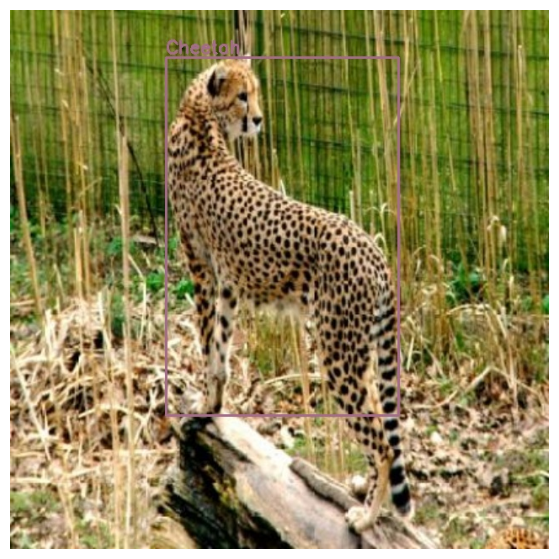

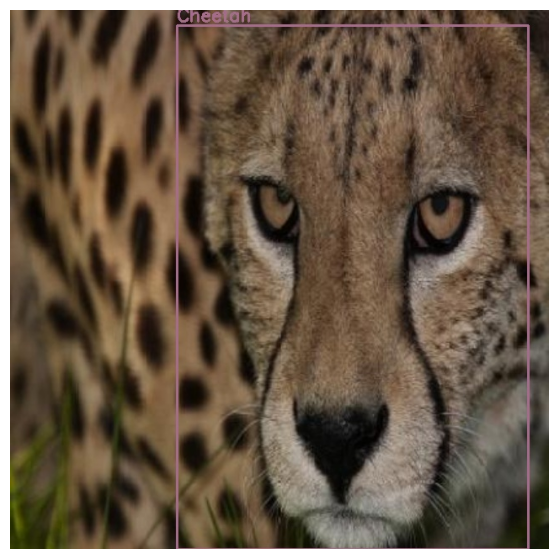

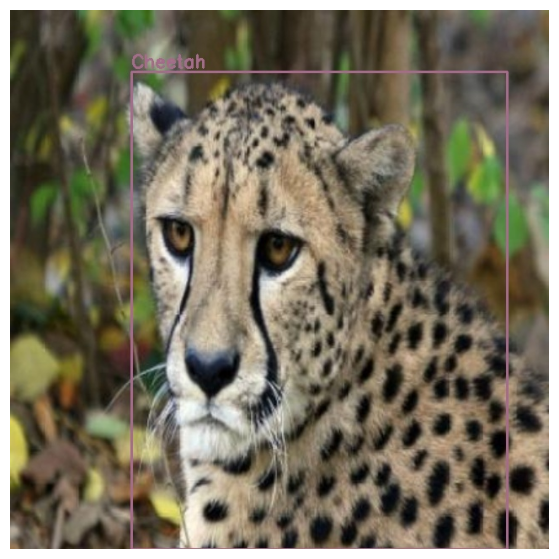

In [ ]:
import matplotlib.pyplot as plt
import glob as glob

# get path
results_dir_path = '/content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training'

# get matching files, in this case, jpg images
valid_images = glob.glob(f"{results_dir_path}/*.jpg")

# get 3 images and display
for i in range(3):
    plt.figure(figsize=(10, 7))
    image = plt.imread(valid_images[i])
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Finally, evaluation
For the last step, the performance was evaluated using mAP (mean absolute presicion).

Mean Average Precision(mAP) is a metric used to evaluate object detection models such as Fast R-CNN, YOLO, Mask R-CNN, etc. The mean of average precision(mAP) values are calculated over recall values from 0 to 1. (Shah, 2022)

mAP formula is based on the following sub metrics:
- Confusion Matrix,
- Intersection over Union(IoU),
- Recall,
- Precision

Shah, D. (2022, March 7). Mean Average Precision (mAP) Explained: Everything You Need to Know. Www.v7labs.com. https://www.v7labs.com/blog/mean-average-precision

In [ ]:
# No verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2

2023-11-20 21:56:21.380092: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 21:56:21.380155: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 21:56:21.380198: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 21:56:22.898458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 299/299 [00:00<00:00, 223307.85it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max nu

In [ ]:
# Verbose mAP.
!python eval.py --weights outputs/training/custom_training/best_model.pth --data data_configs/custom_data.yaml --model fasterrcnn_resnet50_fpn_v2 --verbose

2023-11-20 21:57:58.432992: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 21:57:58.433053: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 21:57:58.433092: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 21:57:59.771092: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Checking Labels and images...
100% 299/299 [00:00<00:00, 226862.68it/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max nu

##Testing the model over our big cats video

The fine-tuned model is finally done, and inference is performed with our video.

In [ ]:
# mount personal Google Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Infer with video located in Drive
%cd /content/fastercnn-pytorch-training-pipeline/
!python inference_video.py --input "/content/drive/MyDrive/artificialVision-project2/BIG CATS.mp4" --weights /content/fastercnn-pytorch-training-pipeline/outputs/training/custom_training/best_model.pth

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Frame: 3450, Forward pass FPS: 5.913, Forward pass time: 0.169 seconds, Forward pass + annotation time: 0.170 seconds
Frame: 3451, Forward pass FPS: 5.849, Forward pass time: 0.171 seconds, Forward pass + annotation time: 0.172 seconds
Frame: 3452, Forward pass FPS: 5.810, Forward pass time: 0.172 seconds, Forward pass + annotation time: 0.173 seconds
Frame: 3453, Forward pass FPS: 5.867, Forward pass time: 0.170 seconds, Forward pass + annotation time: 0.171 seconds
Frame: 3454, Forward pass FPS: 5.928, Forward pass time: 0.169 seconds, Forward pass + annotation time: 0.170 seconds
Frame: 3455, Forward pass FPS: 5.877, Forward pass time: 0.170 seconds, Forward pass + annotation time: 0.171 seconds
Frame: 3456, Forward pass FPS: 5.716, Forward pass time: 0.175 seconds, Forward pass + annotation time: 0.176 seconds
Frame: 3457, Forward pass FPS: 5.822, Forward pass time: 0.172 seconds, Forward pass + annotation time: 0.1